## Gradients using a user defined function

In [ ]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import seaborn as sns

y = f(x) = x**2 + 5x + 9
dx/dy = 2x**1 + 5
Original tensor: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float16)
Output tensor: tensor([ 15.,  23.,  33.,  45.,  59.,  75.,  93., 113., 135., 159.],
       dtype=torch.float16)
Value for backward pass: tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=torch.float16)
Gradient: tensor([  7.,  18.,  33.,  52.,  75., 102., 133., 168., 207., 250.],
       dtype=torch.float16)
dx/dy: tensor([ 7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.], dtype=torch.float16)


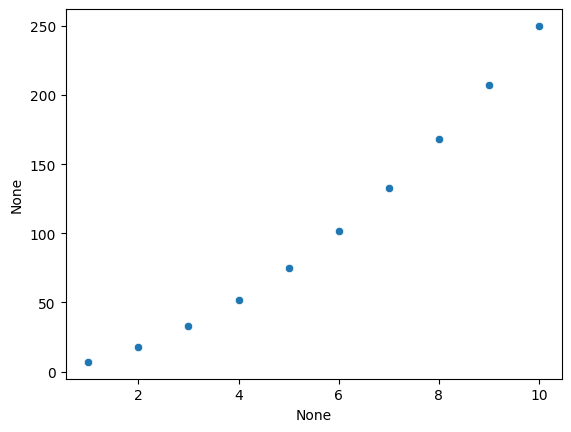

In [10]:
POWER = 2
MULTIPLIER = 5
CONSTANT = 9

# Setup a tensor with gradients enabled.
data_as_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)

# Raise x to some power using the exponential operator.
a = x**POWER

# Add a multiple of x.
b = a + MULTIPLIER*x

# Add a constant.
out = b + CONSTANT
#out = c.sum()

v = torch.tensor(data_as_list, dtype=torch.float16)
out.backward(v, retain_graph=True)
#out.backward()

# What we have is y = f(x) = x**POWER + MULTIPLIER*x + CONSTANT
print(f'y = f(x) = x**{POWER} + {MULTIPLIER}x + {CONSTANT}')
print(f'dx/dy = {POWER}x**{POWER-1} + {MULTIPLIER}')
dx_dy = POWER*x.detach()**(POWER-1) + MULTIPLIER

# Output
print('Original tensor:', x.detach())
print('Output tensor:', out.detach())

print('Value for backward pass:', v.detach())
print('Gradient:', x.grad.detach())
print('dx/dy:', dx_dy)

# Graph the original tensor and the gradient.
sns.scatterplot(x=x.detach(), y=x.grad.detach())

# Clear the gradients for x.
_ = x.grad.zero_()

In [6]:
print('out:')
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

print('\nb:')
print(b.grad_fn)

print('\na:')
print(a.grad_fn)

print('\nx:')
print(x.grad_fn)

out:
((<AddBackward0 object at 0x12bb4ad40>, 0),)
((<AddBackward0 object at 0x12bb4ac20>, 0), (None, 0))
((<PowBackward0 object at 0x12bb4bfd0>, 0), (<MulBackward0 object at 0x12bb4bfa0>, 0))
((<AccumulateGrad object at 0x12bb4ad40>, 0),)

b:

a:

x:
None


In [ ]:
POWER = 2
MULTIPLIER = 5
CONSTANT = 9

# Setup a tensor with gradients enabled.
data_as_list = [3, 6, 9]
x = torch.tensor(data_as_list, dtype=torch.float16, requires_grad=True)

# Raise x to some power using the exponential operator.
a = x**POWER
print('x to the power of 2 plus 10:', a)

# Add a multiple of x.
b = a + MULTIPLIER*x

# Add a constant.
c = b + CONSTANT

# For some reason you have to do this.
out = c.sum()

# What we have is y = f(x) = x**POWER + MULTIPLIER*x + CONSTANT
# dx/dy = POWER*x**(POWER-1) + MULTIPLIER
out.backward()

# Output
print('Original tensor:', x.detach())
print('Output tensor:', out.detach())
print('Gradient:', x.grad.detach())
sns.scatterplot(x=x.detach(), y=x.grad.detach())

# Clear the gradients for x.
_ = x.grad.zero_()

#### Seaborn Test

In [ ]:
plt.plot([3,6,9], [12,23,23])